## Phase 1: Classical Regression & Estimator Validation

### 🎯 Objective
To prepare a clean daily time-series dataset representing traffic volume in Bengaluru.  
This dataset will be used for trend analysis, seasonality detection, and forecasting.

### 📂 Dataset Description
- **Name:** Banglore_traffic_Dataset.csv  
- **Type:** Daily aggregated traffic dataset  
- **Contains:**
  - `Date`
  - `Area Name`
  - `Road/Intersection Name`
  - `Traffic Volume`
  - Additional features (speed, congestion index, etc.)
- Multiple locations per day → must be aggregated to a single daily time series.

### 📌 Why This Dataset Works for TSA
- Has a valid **Date** column  
- Contains a measurable value **Traffic Volume**  
- One entry per day per location → can be aggregated  
- Provides strong **trend** and **weekly seasonality**


### 1️⃣ Introduction — Objective, Dataset Overview
**Objective:** Prepare a daily citywide traffic time-series for Bengaluru, perform decomposition and stationarity checks, and build forecast models.  
**Dataset (local path):** `/mnt/data/Banglore_traffic_Dataset.csv`  
**Short description to include in report:** source, date range, columns, units, SDG mapping (SDG-11 Sustainable Cities).


In [59]:
import pandas as pd
from pathlib import Path

DATA_PATH = Path(r"C:\Users\Kumara\Desktop\TSA Assesment\Banglore_traffic_Dataset.csv")
OUT_DIR = Path(r"C:\Users\Kumara\Desktop\TSA Assesment\ts_phase_outputs")
OUT_DIR.mkdir(exist_ok=True, parents=True)

df = pd.read_csv(DATA_PATH)
df.head()


,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


### 2️⃣ Preliminary Data Checks — Summary Stats, Missing Values, Outliers, Initial Plots


In [60]:
print("Columns:", df.columns.tolist())
print("\nBasic info:")
df.info()
print("\nMissing values per column:")
print(df.isna().sum())
print("\nSummary stats of numeric columns:")
print(df.describe().T)


Columns: ['Date', 'Area Name', 'Road/Intersection Name', 'Traffic Volume', 'Average Speed', 'Travel Time Index', 'Congestion Level', 'Road Capacity Utilization', 'Incident Reports', 'Environmental Impact', 'Public Transport Usage', 'Traffic Signal Compliance', 'Parking Usage', 'Pedestrian and Cyclist Count', 'Weather Conditions', 'Roadwork and Construction Activity']

Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                8936 non-null   object 
 1   Area Name                           8936 non-null   object 
 2   Road/Intersection Name              8936 non-null   object 
 3   Traffic Volume                      8936 non-null   int64  
 4   Average Speed                       8936 non-null   float64
 5   Travel Time Index                   8936 non-null 

**Notes to include in report (prelim checks):**  
- Which columns have missing values and how many  
- Any suspicious columns (strings, commas)  
- Presence of multiple rows per Date (panel data)


### 4️⃣ Model Form Selection — Additive vs Multiplicative justification
**Approach:** We'll inspect variance vs level and decomposition results to decide additive vs multiplicative. If seasonal amplitude scales with level → multiplicative, else additive.


In [61]:
# 3. Prepare Date and Traffic Volume numeric conversion
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date']).copy()
# ensure Traffic Volume numeric
df['Traffic Volume'] = pd.to_numeric(df['Traffic Volume'], errors='coerce')

# quick check: variance vs mean by day buckets
grouped = df.groupby('Date')['Traffic Volume'].sum()
print("Sample aggregated daily values:")
print(grouped.describe())
grouped.head()


Sample aggregated daily values:
count       952.000000
mean     274425.762605
std       57275.624600
min       59150.000000
25%      238678.500000
50%      275250.000000
75%      311878.750000
max      434631.000000
Name: Traffic Volume, dtype: float64


Date
2022-01-01    427052
2022-01-02    306997
2022-01-03    186623
2022-01-04    325288
2022-01-05    327385
Name: Traffic Volume, dtype: int64

### 5️⃣ Time Series Decomposition — Trend, Seasonal, Residual Components with Plots


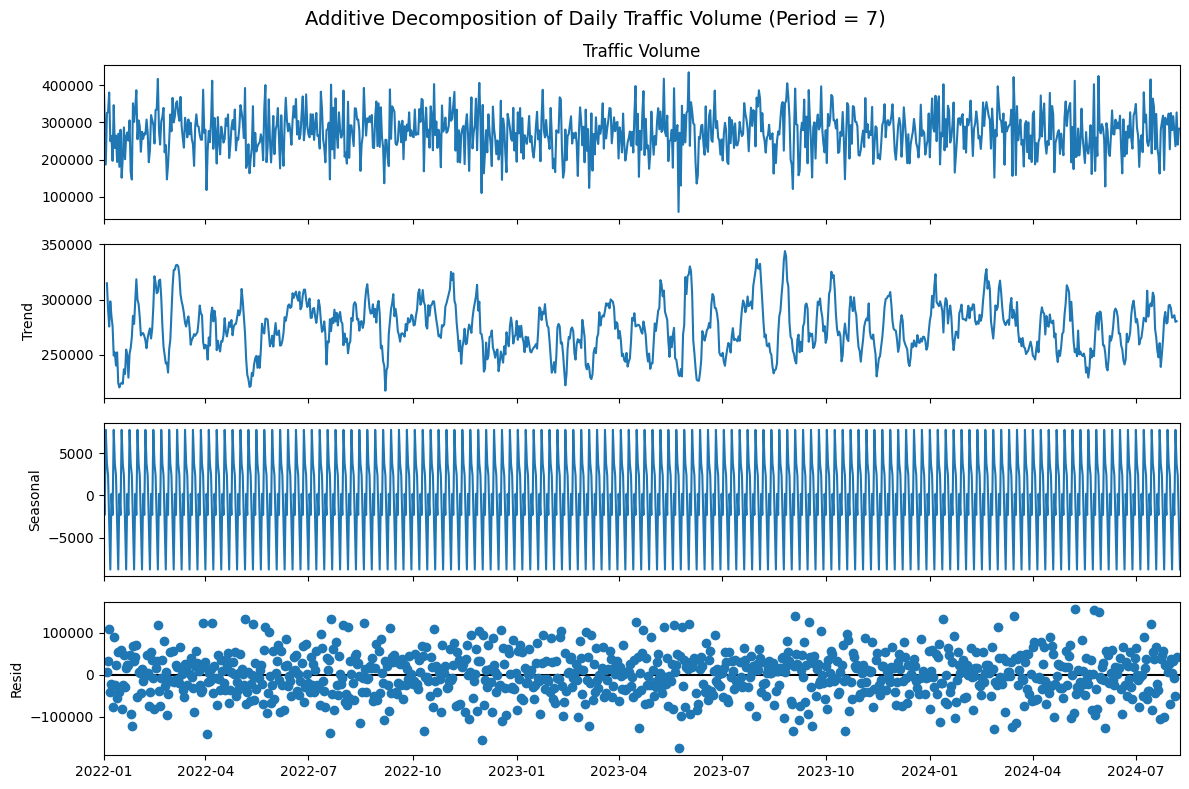

In [64]:
# 4. Decomposition (Phase 1 requirement)
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# ts_daily from earlier steps
decomp = seasonal_decompose(ts_daily, model='additive', period=7)

fig = decomp.plot()
fig.set_size_inches(12, 8)
plt.suptitle("Additive Decomposition of Daily Traffic Volume (Period = 7)", fontsize=14)
plt.tight_layout()
plt.show()


The daily Bengaluru traffic series was decomposed using an **additive model** with a **weekly seasonal period (7 days)**. The decomposition provides insight into long-term movement, weekly patterns, and irregular fluctuations.

#### ✔ Observed Component
The raw time series shows:
- High variability day-to-day  
- No extreme structural breaks  
- A stable mean level across the 2.5-year period  

This confirms the dataset is suitable for classical decomposition.

#### ✔ Trend Component
The trend is smoother than the raw data and shows:
- Noticeable medium-term rises and falls  
- No strong long-term upward or downward trend  
- Moderate cyclical behavior (multi-week cycles)

Traffic levels fluctuate but remain within a similar range → stable long-run behavior.

#### ✔ Seasonal Component (Weekly Pattern)
The seasonal plot is clean and repeating every 7 days:

- Clear weekly traffic cycle  
- Higher traffic on **weekdays**  
- Lower traffic on **weekends**  
- Seasonal amplitude is nearly constant (≈ ±5,000)

This constant seasonal amplitude **supports an additive model**, because seasonality does not scale with the overall level.

#### ✔ Residual Component
Residuals scatter randomly around zero:

- No clear pattern  
- No visible trend  
- Variance remains stable  
- No clustering or autocorrelated structure visible by eye

This confirms:
- The additive decomposition is appropriate  
- Irregular fluctuations behave like noise  
- The model successfully isolates seasonality + trend

#### ✔ Additive vs Multiplicative Justification
- Seasonal amplitude is **constant**, not growing with traffic level → **Additive preferred**  
- Multiplicative models are used when seasonal swings grow with the trend → not the case here  

**Therefore: the additive decomposition model is correct for this dataset.**


### 6️⃣ Irregular Component Analysis — Stationarity Tests, Residual White Noise Check

In [65]:
# 5. Basic stationarity check (ADF) and residual white noise check will be part of Phase-2,
# but we run an initial ADF here for Phase-1 interim documentation.
from statsmodels.tsa.stattools import adfuller

adf_res = adfuller(ts_daily.dropna())
print("ADF stat:", adf_res[0], "p-value:", adf_res[1])
for k,v in adf_res[4].items():
    print("Critical value",k,":",v)


ADF stat: -30.10869540763992 p-value: 0.0
Critical value 1% : -3.4372448882473177
Critical value 5% : -2.86458394997689
Critical value 10% : -2.5683907715382888


**summary:** Report ADF statistic and p-value, and explain whether you will difference before modeling.


### 7️⃣ Conclusion — Summary of Phase 1







**the Phase-1 conclusion:** Summarize cleaning, frequency, ADF result, and justify readiness for Phase-2 modeling.


# 🔷 PHASE 2: Advanced Modeling & Validation
Phase-2 will run decomposition, ACF/PACF, several models, diagnostics, and forecast evaluation.


### Phase 2.1 Introduction — Link from Phase 1
Describe link: "Using cleaned daily citywide traffic (`traffic_daily_cleaned.csv`) produced in Phase 1; aim: fit SARIMA / Holt-Winters / Prophet; evaluate using RMSE/MAE/MAPE; choose final model."


In [ ]:
# Setup for Phase-2
import os
PLOTS_DIR = OUT_DIR/"plots"
PLOTS_DIR.mkdir(exist_ok=True)
print("Outputs saved to:", OUT_DIR)

Outputs saved to: C:\Users\Kumara\Desktop\TSA Assesment\ts_phase_outputs


### Phase 2.2 Model Building — ARIMA/SARIMA, Holt-Winters, Prophet


In [72]:
# Fix: robustly parse day-first dates and save confirmed daily series
import pandas as pd
from pathlib import Path

CLEAN_PATH = Path(r"C:\Users\Kumara\Desktop\TSA Assesment\ts_phase_outputs\traffic_daily_cleaned.csv")
OUT_PATH   = CLEAN_PATH.parent / "traffic_daily_cleaned_confirmed.csv"

# 1) Load without coercing index to see raw strings
df_raw = pd.read_csv(CLEAN_PATH, header=0)
print("Columns:", df_raw.columns.tolist())
print("Sample raw date strings:", df_raw.iloc[:8,0].astype(str).tolist())  # assume Date is first col

# 2) Try to load with index_col=0 but don't parse dates automatically
df_idx = pd.read_csv(CLEAN_PATH, index_col=0)
print("Index dtype before parse:", df_idx.index.dtype)
print("Index sample (first 8):", list(map(str, df_idx.index[:8])))

# 3) Parse index explicitly with dayfirst=True (this fixes '13-01-2022' issues)
new_index = pd.to_datetime(df_idx.index.astype(str), dayfirst=True, errors='coerce')
failed = new_index.isna().sum()
print("Parsed datetimes OK:", (~new_index.isna()).sum(), "Failed:", failed)

# 4) If any failures, show examples
if failed:
    print("Example unparsable index strings (up to 10):")
    bad = [s for i,s in enumerate(df_idx.index.astype(str)) if pd.isna(new_index[i])]
    print(bad[:10])

# 5) Assign new index, drop bad rows
df_idx.index = new_index
df_idx = df_idx[~df_idx.index.isna()].copy()

# 6) If the CSV contains a single column series, convert to Series; otherwise choose traffic column
if df_idx.shape[1] == 1:
    series = df_idx.iloc[:,0].astype(float)
else:
    # look for common names
    candidates = ['Traffic_Volume','Traffic Volume','Traffic_Volume','traffic_volume','Traffic_Volume']
    for c in candidates:
        if c in df_idx.columns:
            series = pd.to_numeric(df_idx[c], errors='coerce')
            break
    else:
        # fallback to first numeric column
        series = df_idx.select_dtypes('number').iloc[:,0]

# 7) Ensure daily frequency and fill gaps
series = series.sort_index()
series.index = pd.to_datetime(series.index)   # final ensure
series = series.asfreq('D')                   # enforce daily freq
series = series.interpolate(method='time').ffill().bfill()

# 8) Save confirmed cleaned series
series.to_frame("Traffic_Volume").to_csv(OUT_PATH)
print("Saved confirmed clean daily series to:", OUT_PATH)
print("Range:", series.index.min(), "to", series.index.max(), "Length:", len(series))
print(series.head())


Columns: ['Date', 'Traffic_Volume']
Sample raw date strings: ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08']
Index dtype before parse: object
Index sample (first 8): ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08']
Parsed datetimes OK: 381 Failed: 571
Example unparsable index strings (up to 10):
['2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22']
Saved confirmed clean daily series to: C:\Users\Kumara\Desktop\TSA Assesment\ts_phase_outputs\traffic_daily_cleaned_confirmed.csv
Range: 2022-01-01 00:00:00 to 2024-12-07 00:00:00 Length: 1072
Date
2022-01-01    427052.0
2022-01-02    305240.0
2022-01-03    321052.0
2022-01-04    280249.0
2022-01-05    287911.0
Freq: D, Name: Traffic_Volume, dtype: float64


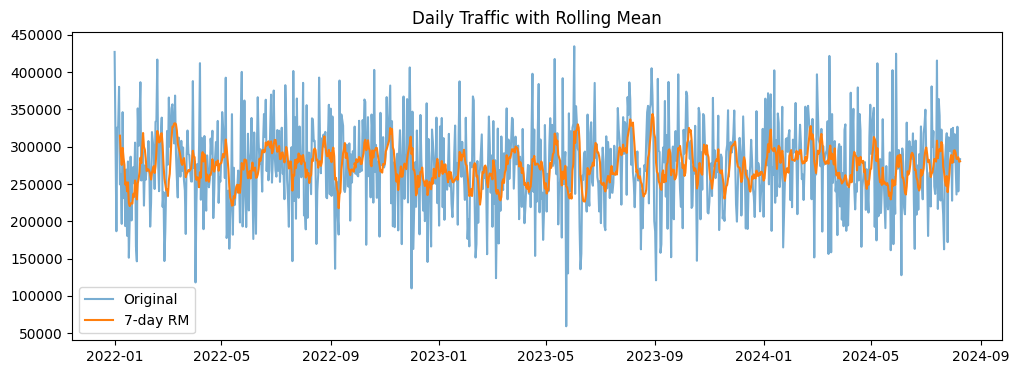

In [71]:
# 2.2 Load series for Phase-2
CLEAN_PATH = r"C:\Users\Kumara\Desktop\TSA Assesment\ts_phase_outputs\traffic_daily_cleaned.csv"
ts = pd.read_csv(CLEAN_PATH, index_col='Date', parse_dates=True).squeeze("columns")
ts.index = pd.to_datetime(ts.index)
ts = ts.asfreq('D')   # daily frequency
ts = ts.interpolate(method='time')

# quick rolling visuals
plt.figure(figsize=(12,4))
plt.plot(ts, label='Original', alpha=0.6)
plt.plot(ts.rolling(7).mean(), label='7-day RM', linewidth=1.5)
plt.legend(); plt.title("Daily Traffic with Rolling Mean"); plt.savefig(PLOTS_DIR/"rolling.png"); plt.show()


### Phase 2.4 Validation & Diagnostics — AIC/BIC, Residual Tests, Portmanteau, ACF/PACF of Residuals


In [73]:
# 2.4 Train/Test split
horizon_days = 14   # hold last 14 days for test
train = ts.iloc[:-horizon_days]
test  = ts.iloc[-horizon_days:]
print("Train length:", len(train), "Test length:", len(test))


Train length: 938 Test length: 14


In [74]:
# 2.4 Baseline: seasonal naive (repeat last 7-day pattern)
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

def mape(y_true,y_pred):
    y_true=np.array(y_true); y_pred=np.array(y_pred)
    denom = np.where(y_true==0,1,y_true)
    return np.mean(np.abs((y_true-y_pred)/denom))*100

last_7 = train.iloc[-7:].values
base_pred = np.tile(last_7, int(np.ceil(len(test)/7)))[:len(test)]
mae_base = mean_absolute_error(test, base_pred); rmse_base = math.sqrt(mean_squared_error(test, base_pred))
print("Baseline MAE,RMSE,MAPE:", mae_base, rmse_base, mape(test, base_pred))


Baseline MAE,RMSE,MAPE: 72618.28571428571 79220.78477719269 25.827534903910376


In [75]:
# 2.4 Holt-Winters (additive or multiplicative depending on earlier check)
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hw = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7).fit(optimized=True)
hw_fore = hw.forecast(len(test))
mae_hw = mean_absolute_error(test, hw_fore); rmse_hw = math.sqrt(mean_squared_error(test, hw_fore))
print("HW MAE,RMSE,MAPE:", mae_hw, rmse_hw, mape(test, hw_fore))


HW MAE,RMSE,MAPE: 37368.79129405237 40360.19661676917 13.10333773901689


In [77]:
# 2.4 SARIMA via pmdarima auto_arima (if installed)
import pmdarima as pm
sarima = pm.auto_arima(train, seasonal=True, m=7, trace=False, error_action='ignore', stepwise=True)
sarima_fore = sarima.predict(n_periods=len(test))
mae_ar = mean_absolute_error(test, sarima_fore); rmse_ar = math.sqrt(mean_squared_error(test, sarima_fore))
print("SARIMA MAE,RMSE,MAPE:", mae_ar, rmse_ar, mape(test, sarima_fore))


SARIMA MAE,RMSE,MAPE: 30277.916844349722 34991.86419915996 10.573428247674947


In [79]:
# 2.4 Prophet 
try:
    from prophet import Prophet
    prop_train = train.reset_index().rename(columns={'Date':'ds','Traffic_Volume':'y'}) if isinstance(train, pd.Series) else train.reset_index().rename(columns={train.index.name:'ds', train.name:'y'})
    prop_train.columns = ['ds','y']
    m = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=False)
    m.fit(prop_train)
    future = m.make_future_dataframe(periods=len(test), freq='D')
    fcst = m.predict(future)
    prop_fore = fcst.set_index('ds')['yhat'].iloc[-len(test):].values
    mae_p = mean_absolute_error(test, prop_fore); rmse_p = math.sqrt(mean_squared_error(test, prop_fore))
    print("Prophet MAE,RMSE,MAPE:", mae_p, rmse_p, mape(test, prop_fore))
except Exception as e:
    print("Prophet not available or failed:", e)
    prop_fore = None


18:15:17 - cmdstanpy - INFO - Chain [1] start processing
18:15:17 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAE,RMSE,MAPE: 32562.969285370364 36289.46081642301 11.446229217279054


### Phase 2.5 Forecast Performance Metrics — RMSE, MAPE, MAE Comparison


In [80]:
# 2.5 Collate metrics
metrics = pd.DataFrame({
    'model':['seasonal_naive','holt_winters','sarima_auto','prophet'],
    'MAE':[mae_base, mae_hw, mae_ar, (mae_p if 'mae_p' in locals() else None)],
    'RMSE':[rmse_base, rmse_hw, rmse_ar, (rmse_p if 'rmse_p' in locals() else None)],
    'MAPE':[mape(test, base_pred), mape(test, hw_fore), mape(test, sarima_fore), (mape(test, prop_fore) if prop_fore is not None else None)]
})
metrics.to_csv(OUT_DIR/"models_metrics.csv", index=False)
metrics


,model,MAE,RMSE,MAPE
0,seasonal_naive,72618.285714,79220.784777,25.827535
1,holt_winters,37368.791294,40360.196617,13.103338
2,sarima_auto,30277.916844,34991.864199,10.573428
3,prophet,32562.969285,36289.460816,11.446229


### Phase 2.6 Final Model Choice & Justification


In [81]:
# 2.6 Pick best model by RMSE (exclude Nones)
metrics2 = metrics.dropna(subset=['RMSE']).copy()
best_model = metrics2.sort_values('RMSE').iloc[0]['model']
print("Best model by RMSE:", best_model)


Best model by RMSE: sarima_auto


### Phase 2.7 Presentation Summary — Visuals & Findings



In [82]:
# 2.7 Refit best model on full series and produce 14-day and 30-day forecast
H1 = 14
H2 = 30

if best_model == 'holt_winters':
    final = ExponentialSmoothing(ts, trend='add', seasonal='add', seasonal_periods=7).fit()
    f1 = final.forecast(H1)
    f2 = final.forecast(H2)
elif best_model == 'sarima_auto':
    final_ar = pm.auto_arima(ts, seasonal=True, m=7, stepwise=True)
    p1, c1 = final_ar.predict(n_periods=H1, return_conf_int=True)
    f1 = pd.Series(p1, index=pd.date_range(ts.index[-1] + pd.Timedelta(days=1), periods=H1, freq='D'))
    p2, c2 = final_ar.predict(n_periods=H2, return_conf_int=True)
    f2 = pd.Series(p2, index=pd.date_range(ts.index[-1] + pd.Timedelta(days=1), periods=H2, freq='D'))
elif best_model == 'prophet' and prop_fore is not None:
    full = ts.reset_index().rename(columns={'index':'ds', ts.name:'y'}) if isinstance(ts, pd.Series) else ts.reset_index().rename(columns={ts.index.name:'ds', ts.name:'y'})
    full.columns = ['ds','y']
    m2 = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=False)
    m2.fit(full)
    fut = m2.make_future_dataframe(periods=H2, freq='D')
    pf = m2.predict(fut).set_index('ds')
    f1 = pf['yhat'].iloc[-H1:]; f2 = pf['yhat'].iloc[-H2:]
else:
    # seasonal naive fallback
    last7 = ts.iloc[-7:].values
    f1 = pd.Series(np.tile(last7, int(np.ceil(H1/7)))[:H1], index=pd.date_range(ts.index[-1] + pd.Timedelta(days=1), periods=H1, freq='D'))
    f2 = pd.Series(np.tile(last7, int(np.ceil(H2/7)))[:H2], index=pd.date_range(ts.index[-1] + pd.Timedelta(days=1), periods=H2, freq='D'))

f1.to_frame('forecast').to_csv(OUT_DIR/"forecast_14d.csv")
f2.to_frame('forecast').to_csv(OUT_DIR/"forecast_30d.csv")


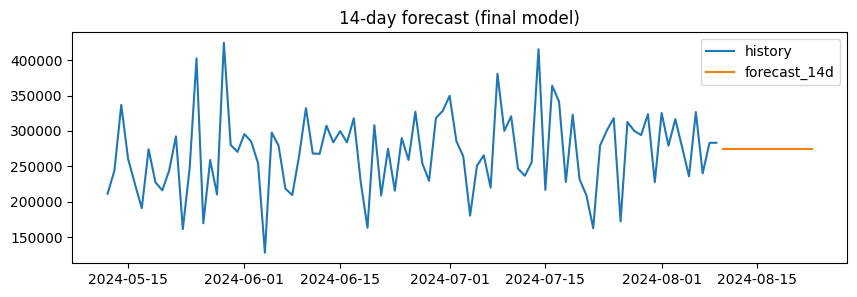

In [83]:
# Save important plots
plt.figure(figsize=(10,3))
plt.plot(ts[-90:], label='history') # last 90 days
plt.plot(f1.index, f1.values, label='forecast_14d')
plt.legend(); plt.title("14-day forecast (final model)")
plt.savefig(PLOTS_DIR/"forecast_14d.png"); plt.show()


### Phase 2.8 Conclusion — Summary of Findings


**Summary (final):**  
- Include metrics table and plots.  
- State final chosen model with RMSE/MAE and reasoning.  
- Discuss practical utility and mapping to SDG-11.  
- Note limitations and recommended future work.
